<center>
    <h2 style="color:  #526cfe; font-family: Arial, sans-serif; font-size: 32px; padding: 10px;">
        Week 10: Rasterio and Geopandas
    </h2>
</center>

In [29]:
import geopandas as gpd
import rasterio
import os
import rasterio.plot
import matplotlib.pyplot as plt
from rasterstats import zonal_stats
import pandas as pd

### Install package using Terminal in vscode

- pip install rasterstats

### Read dem_clip data

In [6]:
dem = rasterio.open('dem_clip.tif')
dem

<open DatasetReader name='dem_clip.tif' mode='r'>

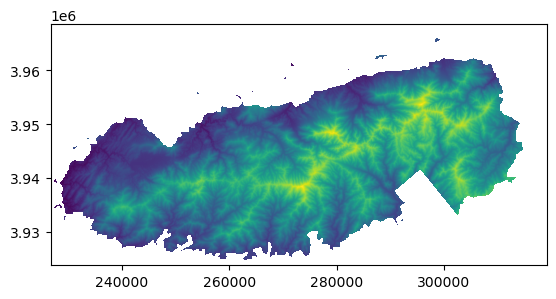

<Axes: >

In [7]:
rasterio.plot.show(dem)

### Zonal statistics

[vegatation dataset](https://irma.nps.gov/DataStore/Reference/Profile/1048440)

<Axes: >

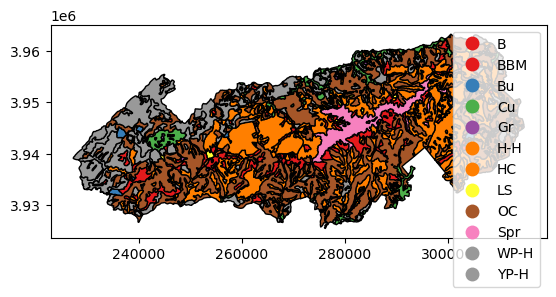

In [17]:
vegetation = gpd.read_file('GRSM_Miller_Veg_Disturbance_Poly.shp')

vegetation.plot(column='Vegetation', cmap='Set1', legend=True, edgecolor='black')


In [22]:
vegetation.head(n = 5)

,Vegetation,Fire,Burn_Year,SHAPE_Leng,SHAPE_Area,geometry
0,YP-H,No,0,2638.620257,364435.886459,"POLYGON ((278303.431 3927043.744, 278282.848 3..."
1,YP-H,No,0,5738.740682,696264.849984,"POLYGON ((280030.127 3927158.745, 280089.91 39..."
2,Cu,No,0,1257.510759,92806.732311,"POLYGON ((276203.326 3927336.721, 276243.672 3..."
3,Gr,No,0,2142.453371,251991.089021,"POLYGON ((267657.425 3926708.658, 267616.933 3..."
4,Cu,No,0,1179.776968,79705.138579,"POLYGON ((276326.468 3927872.711, 276313.159 3..."


- [Zonal Statistics](https://pythonhosted.org/rasterstats/manual.html#zonal-statistics)
- no datavalue
- stats in zonal statistics

In [32]:
dem_fp = 'dem_clip.tif'
with rasterio.open(dem_fp) as src:
    dem_array = src.read(1)  # Read the first band as a NumPy array
    transform = src.transform
    nodata_value = src.nodata

In [ ]:
stats = zonal_stats(vegetation, dem_array, affine=transform, stats=["min", "max", "mean", "std"])
stats

[{'min': None, 'max': None, 'mean': None, 'std': None},
 {'min': 1844.9234619140625,
  'max': 2647.184326171875,
  'mean': 2196.1931216931216,
  'std': 198.27170221866461},
 {'min': None, 'max': None, 'mean': None, 'std': None},
 {'min': 1723.0821533203125,
  'max': 1951.3394775390625,
  'mean': 1807.4084578804348,
  'std': 60.898157190126355},
 {'min': None, 'max': None, 'mean': None, 'std': None},
 {'min': 1711.120361328125,
  'max': 2602.3740234375,
  'mean': 2012.9280303030303,
  'std': 163.6175614780193},
 {'min': None, 'max': None, 'mean': None, 'std': None},
 {'min': None, 'max': None, 'mean': None, 'std': None},
 {'min': 2627.56689453125,
  'max': 2995.9287109375,
  'mean': 2795.6140202702704,
  'std': 86.20443886540346},
 {'min': 2764.72314453125,
  'max': 3028.632568359375,
  'mean': 2885.325568181818,
  'std': 66.81694204091734},
 {'min': 1935.991943359375,
  'max': 2565.87255859375,
  'mean': 2284.0976322263223,
  'std': 122.14818119318673},
 {'min': 1614.4442138671875,
  '

In [50]:
stats_df = pd.DataFrame(stats)

In [51]:
stats_df.head(n = 5)

,min,count,max,mean,std
0,NaN,0,NaN,NaN,NaN
1,1844.923462,567,2647.184326,2196.193122,198.271702
2,NaN,0,NaN,NaN,NaN
3,1723.082153,92,1951.339478,1807.408458,60.898157
4,NaN,0,NaN,NaN,NaN


In [ ]:
vegetation = vegetation.join(stats_df)
vegetation.head(n=5)

,Vegetation,Fire,Burn_Year,SHAPE_Leng,SHAPE_Area,geometry,min,max,mean,std
0,YP-H,No,0,2638.620257,364435.886459,"POLYGON ((278303.431 3927043.744, 278282.848 3...",NaN,NaN,NaN,NaN
1,YP-H,No,0,5738.740682,696264.849984,"POLYGON ((280030.127 3927158.745, 280089.91 39...",1844.923462,2647.184326,2196.193122,198.271702
2,Cu,No,0,1257.510759,92806.732311,"POLYGON ((276203.326 3927336.721, 276243.672 3...",NaN,NaN,NaN,NaN
3,Gr,No,0,2142.453371,251991.089021,"POLYGON ((267657.425 3926708.658, 267616.933 3...",1723.082153,1951.339478,1807.408458,60.898157
4,Cu,No,0,1179.776968,79705.138579,"POLYGON ((276326.468 3927872.711, 276313.159 3...",NaN,NaN,NaN,NaN
